## Cluster Evaluation

Usually, clustering dataset does not gave target label, which means clustering is unsupervised learning. This is big difference between classification.  
Then how can we evaluate cluster?

### Introduction to Silhouette Analysis

Silhouette Analysis: Evaluate how efficiently each clusters are sepereated.  
Silhouette Coefficient(s(i)): Indicator that represents distance between in-cluster data and out-cluster data  
a(i) = average of in-cluster data distances  
b(i) = average of the closest out-cluster data distances  
s(i) = (b(i)-a(i)) / max(a(i),b(i))  
s(i) takes (-1,1) value and if s(i) is close to 0, it means data is close to the closest out-cluster

sklearn.metrics.silhouette_samples(X, labels, metric='euclidean', **kwds):  
input X feature dataset and cluster label data, return silhouette coef.  

sklearn.metrics.silhouette_scores(X, labels, metric='euclidean', **kwds):  
input X feature dataset and cluster label data, return average of silhouette coef.s

Two condition for good clustering  
1. Average of silhouette scores is close to 1  
2. Mean values of each clusters' silhouette scores have low varinace.

### Cluster Evaluation with Iris data Clustering

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3).fit(irisDF)

irisDF['cluster'] = kmeans.labels_

# Calculate Silhouette Coef for every data 
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('Shape of silhouette_samples return value' , score_samples.shape)

irisDF['silhouette_coeff'] = score_samples

# Average Silhouette Coef > Silhoutte Score
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('Silhouette Analysis Score:{0:.3f}'.format(average_score))

irisDF.head(3)

Shape of silhouette_samples return value (150,)
Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,0.852955
1,4.9,3.0,1.4,0.2,0,0.815495
2,4.7,3.2,1.3,0.2,0,0.829315


In [3]:
# Silhouette Coef.s of Cluster 0 are close to 0.8 but Silhouette Score is 0.55 which is less than 0.8
# Check other Clusters' Silhouette Coef.s using groupby()
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.798140
1    0.417320
2    0.451105
Name: silhouette_coeff, dtype: float64

### Find Optimal # of Cluster by Visualize Average Silhouette Coefs. of each Clusters

Sklearn Document for visualize Silhouette Analysis:  
http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

For n_clusters = 2 The average silhouette_score is : 0.7359768163013617
For n_clusters = 3 The average silhouette_score is : 0.7672389188869323
For n_clusters = 4 The average silhouette_score is : 0.5781575531156443
For n_clusters = 5 The average silhouette_score is : 0.5588228471469963
For n_clusters = 6 The average silhouette_score is : 0.4584799858881079


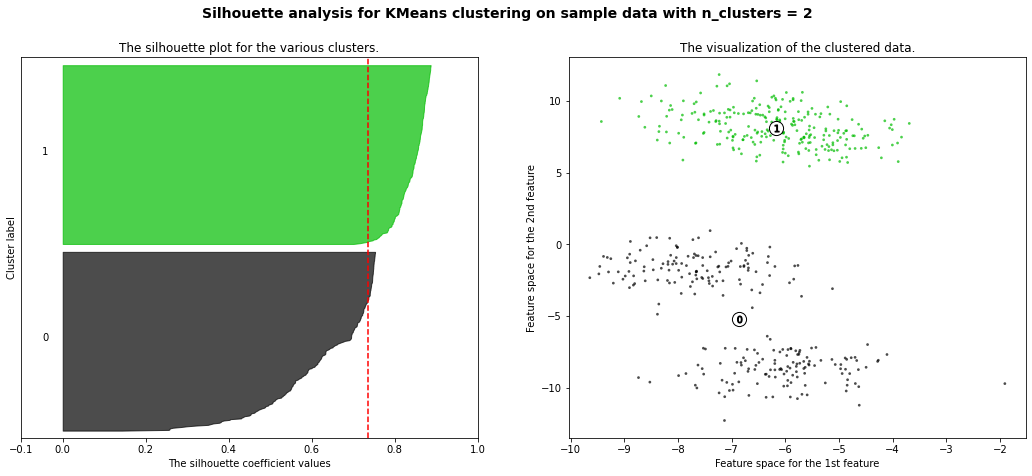

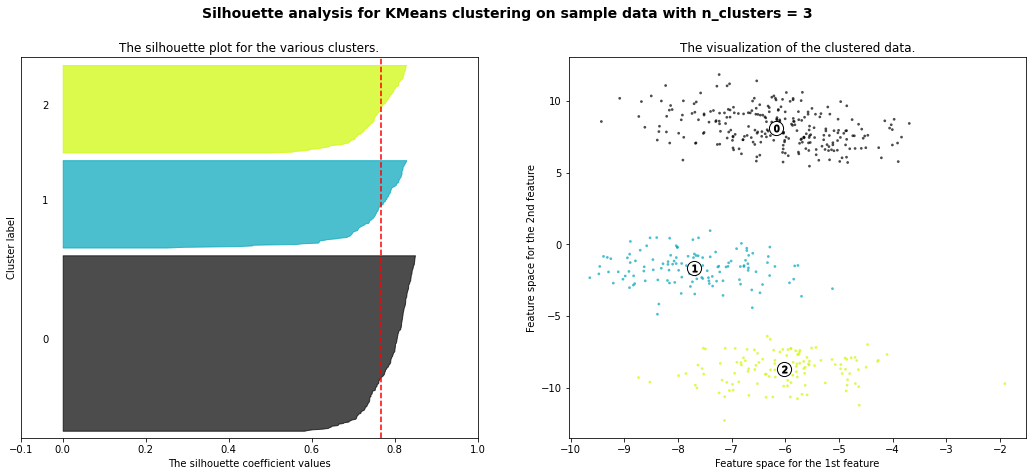

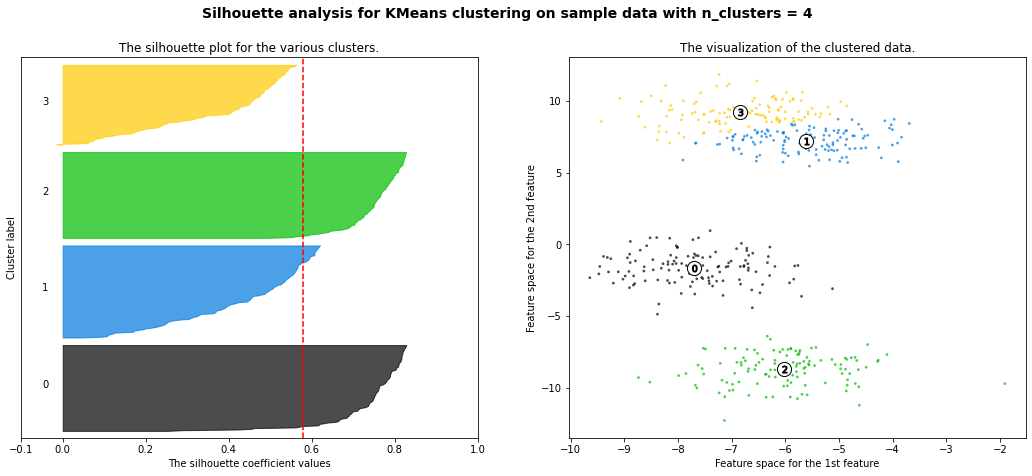

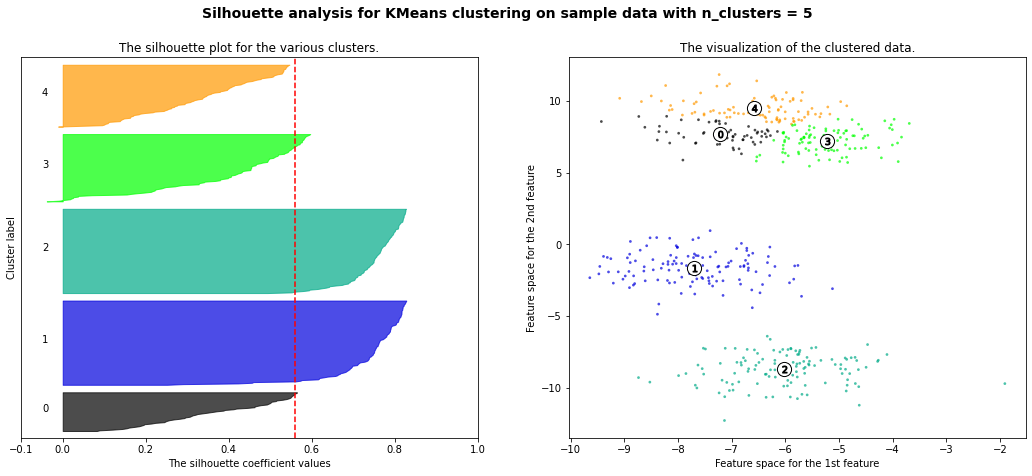

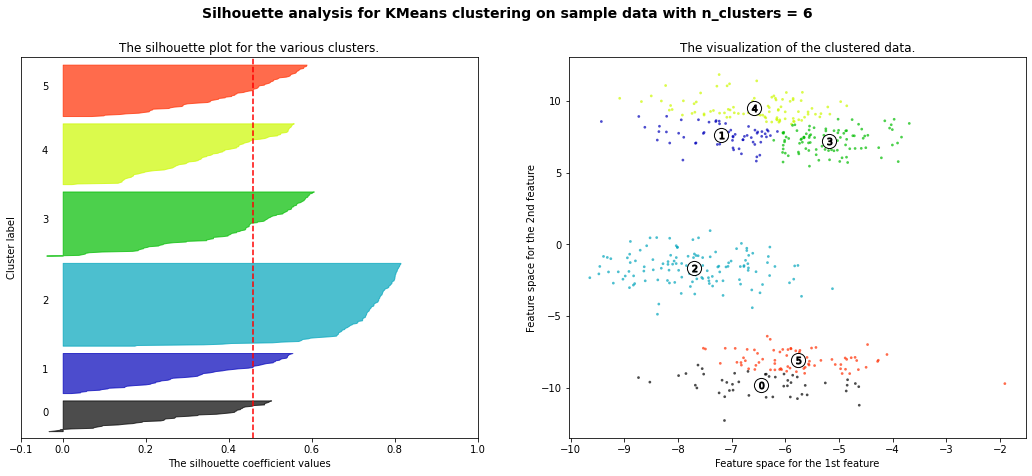

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
    center_box=(-10.0, 10.0), shuffle=True)

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()